# <center>Data Visualisation Final - NBA Study
## <center>By: Zachary Goodman

## <center>Introduction

The NBA (National Basketball Association) has been a popular sports league amongst the entire world since its inception in 1949. Inevitably, over the past 78 seasons, the game has significantly changed. The number of teams has grown from 17 to 30, and there has been a vast change in play style. For example, a pillar aspect of today’s game is the 3-point shot, but this wasn’t introduced until 1979 (Bhatnagar, 2022).

However, despite other aspects of the NBA’s change, over the past 20+ years, there has been an explosion in the number of scored points per game (PPG). From The Athletic, a sports news website, the writers support this by saying, “NBA teams have never been better at scoring points than they are right now” (The Athletic NBA Staff, 2023, para. 1). 

We must ask what the cause of this scoring increase is. In this study, I aim to examine the statistics of each team from NBA seasons 1997-1998 to 2021-2022, with the goal to uncover trends that will help us better understand what is behind this scoring phenomenon. 

**Please note that PPG is the abbreviation for “Points Per Game” moving forward.**

## <center>Research Questions

This study will focus on three main research questions, with individual examinations within each.

1. **Research Question 1: How are the different scoring methods (shot types) related to the average PPG?**
    - a. Field Goals
    - b. 3-Pointers
    - c. Free Throws

2. **Research Question 2: How are defensive statistics related to the average PPG?**
    - a. Blocks
    - b. Steals
    - c. Defensive rebounds
    
3. **Research Question 3: Which other statistics might affect the average PPG?**
    - a. Assists
    - b. Personal fouls
    
While there are endless analyses we can conduct with NBA statistics, examining scoring, defensive, and other statistics compared to the average PPG will yield telling results about the factors of the past 20+ seasons' scoring explosion.

## <center> Definitions
Before we dive into the analysis, here is a brief definition for each statistic:

### Scoring Methods

**Field Goal**: A scored basket made from anywhere on the court. This includes 3-Pointers, but excludes free throws. If not a 3-Pointer, it counts for 2 points.   
+ (FGM): Field Goals Made
+ (FGA): Field Goals Attempted
    
**3-Pointer**: A scored basket made from behind the 3-Point arch, which is worth 3 points. This also counts as a field goal.
+ (3PM): 3-Pointers Made
+ (3PA): 3-Pointers Attempted

**Free Throw**: A shot awarded to a player once they've been fouled. A free throw counts for 1 point, and is not considered a field goal.
+ (FTM): Free Throws Made
+ (FTA): Free Throws Attempted

### Defense

**Block**: A deflection of an opponent’s shot attempt, preventing them from scoring.
    
**Steal**: Defensively gaining possession of the ball from the opponent.

**Defensive Rebounds**: Retrieval of the ball after a missed field goal attempt by the opponent.


### Other

**Assist**: A pass that leads directly to a teammate scoring a field goal.
    
**Personal Foul**: An illegal physical contact caused by one player onto another.


In [1]:
#Import all libraries
import pandas as pd
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt

## <center>Data Source

The CSV used is titled "NBA_Team_Stats.csv", and this contains the yearly average statistics of each NBA team, from the seasons 1997-1998 to 2021-2022. This data was retrieved by a website called data.world, which is a reliable catalog of datasets.

With a high level of professionalism and expertise, NBA statistics are meticulously recorded and monitored. Also, with the ability to compare this dataset to other datasets that exist, I was able to verify the validity of this dataset.

In [2]:
#Read in the CSVs
#This dataset was provided by data.world, a dataset website

teams = pd.read_csv("NBA_Team_Stats.csv") #import team stat info
teams.head()

,No,Team,G,Min,Pts,Reb,Ast,Stl,Blk,To,...,Oreb,Fgm-a,Pct,3gm-a,Pct.1,Ftm-a,Pct.2,Eff,Deff,Year
0,1,Chicago,103,48.4,96.0,44.1,23.1,8.6,4.3,13.0,...,14.9,36.7-81.7,0.449,3.9-12.0,0.323,18.7-25.2,0.741,111.6,17.5,1997-1998
1,2,Utah,102,48.3,98.6,40.8,24.7,7.6,4.8,14.7,...,11.3,35.9-74.3,0.483,3.1-8.4,0.368,23.8-30.9,0.768,116.3,17.5,1997-1998
2,3,Phoenix,86,48.6,99.3,41.9,25.6,9.2,5.3,14.4,...,12.1,38.2-82.0,0.466,5.2-14.7,0.355,17.7-23.6,0.747,117.1,13.6,1997-1998
3,4,L.A.Lakers,95,48.3,104.8,42.9,24.3,8.7,6.8,14.7,...,13.2,38.0-79.1,0.480,6.1-17.3,0.350,22.8-33.7,0.675,120.8,13.2,1997-1998
4,5,San Antonio,91,48.4,92.5,44.1,21.9,6.2,6.9,15.3,...,11.9,35.1-75.1,0.468,3.7-10.8,0.344,18.5-26.8,0.688,108.0,13.1,1997-1998


## <center>Pre-Processing


Below, I've taken steps to organize the data so it could be properly manipulated and handled. First, I renamed "Year" to "Season" for clarity.

Additionally, with field goals, 3-pointers, and free throws, the original dataset contained both the made attempts and the total attempts in a single column for each. Since it is best that these statistics are separate, I used the .split method by splitting the value at the hyphen, and separating the values into their proper new columns.
    
Along with this, there were columns named ["Pct", "Pct.1", Pct.2"], which were vague. I realized that this was the percentage of makes/attempts for the three types of shots, but I figured I could calculate that on my own. Therefore, I deleted these vague columns.

NBA seasons are depicted by the year the season started along with the year the season ended. To prevent any issues caused by this, I edited the "Season" column so that it would only refer to the year that the season started.
    
After creating the new columns, I redefined the dtypes of the average of makes and attempts to float64 because they all have decimals. Additionally, I changed the dtype of "Season" to int64 because years are whole numbers.

Lastly, I created the new percentage columns for the ones I previously dropped, reordered the columns so that the corresponding statistics were next to each other, and dropped more unnecessary columns.

In [3]:
#Renaming column
teams = teams.rename(columns={"Year":"Season"})

#Splitting the [makes, attempts] columns into two separate columns for field goals, 3-pointers, and free throws
teams[["FGM", "FGA"]] = teams["Fgm-a"].str.split('-', expand=True)
teams[["3PM", "3PA"]] = teams["3gm-a"].str.split('-', expand=True)
teams[["FTM", "FTA"]] = teams["Ftm-a"].str.split('-', expand=True)

#Dropping vague column names
teams = teams.drop(columns=["Pct", "Pct.1", "Pct.2"])


#Since NBA seasons go through the new year, they are documented as (year season started - year season ended)
#This will get confusing when making visualisations, so we will just refer to the season years as the year which the season begun
teams["Season"] = teams["Season"].str.split('-', expand=True)[0]

teams.columns

Index(['No', 'Team', 'G', 'Min', 'Pts', 'Reb', 'Ast', 'Stl', 'Blk', 'To', 'Pf',
       'Dreb', 'Oreb', 'Fgm-a', '3gm-a', 'Ftm-a', 'Eff', 'Deff', 'Season',
       'FGM', 'FGA', '3PM', '3PA', 'FTM', 'FTA'],
      dtype='object')

In [4]:
#Redefining dtypes accordingly
teams["Team"] = teams["Team"].astype('string')
teams["FGM"] = teams["FGM"].astype('float64')
teams["FGA"] = teams["FGA"].astype('float64')
teams["3PM"] = teams["3PM"].astype('float64')
teams["3PA"] = teams["3PA"].astype('float64')
teams["FTM"] = teams["FTM"].astype('float64')
teams["FTA"] = teams["FTA"].astype('float64')
teams["Season"] = teams["Season"].astype('int64')

In [5]:
#Recreating the percentage variables for the ones I dropped earlier
teams["FG%"] = teams["FGM"]/teams["FGA"]
teams["3P%"] = teams["3PM"]/teams["3PA"]
teams["FT%"] = teams["FTM"]/teams["FTA"]
#Rounding the values so that there are 3 decimal places rather than 6
teams["FG%"] = teams["FG%"].round(3)
teams["3P%"] = teams["3P%"].round(3)
teams["FT%"] = teams["FT%"].round(3)



#Re-ordering the columns so that each of the related stats are next to each other and organized
teams = teams[['No', 'Team', 'G', 'Min', 'Pts', 'Reb', 'Ast', 'Stl', 'Blk', 'To', 'Pf',
       'Dreb', 'Oreb', 'Fgm-a' ,'FGM', 'FGA', 'FG%',  '3gm-a','3PM', '3PA', '3P%', 'Ftm-a','FTM', 'FTA', 'FT%',
       'Eff', 'Deff', 'Season']]

#Drop the original columns for the three types of shots
teams = teams.drop(columns = ["Fgm-a", "3gm-a", "Ftm-a"])

## <center>Analysis
    
Firstly, let's visualize how extreme this explosion in scoring from 1997-2021 really is.

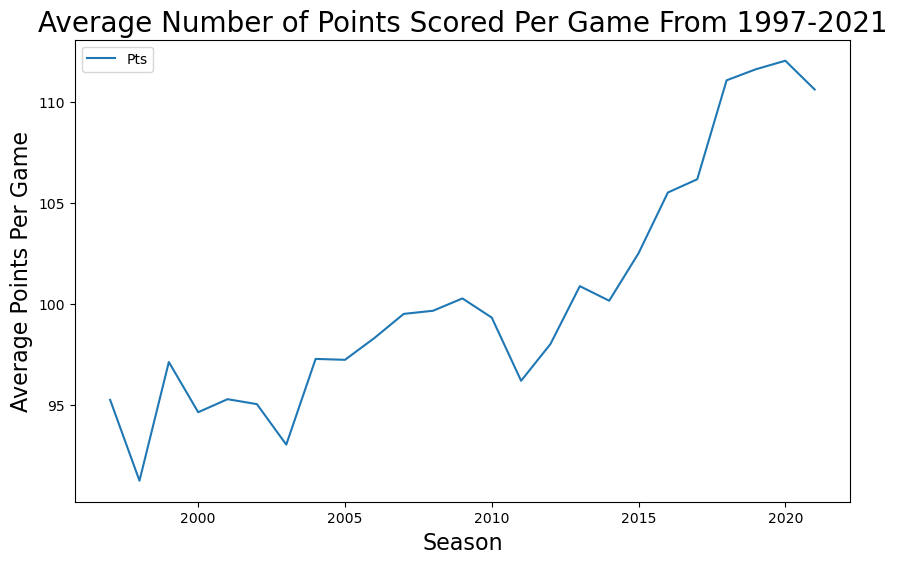

In [6]:
#Taking just the values from the points and seasons column
byYear = teams[["Pts", "Season"]].copy()
#Getting the average of points by each season. This means I'm averaging each team's average of points per game by each season.
byYear = byYear.groupby("Season").mean()

#Plot this
ax = byYear.plot()
#store the current figure in fig
fig = plt.gcf()
#increase the size of the graph
fig.set_size_inches(10,6)
#Set title, xlabel, ylabel, and their fontsizes
ax.set_title("Average Number of Points Scored Per Game From 1997-2021", fontsize=20)
ax.set_xlabel("Season", fontsize=16)
ax.set_ylabel("Average Points Per Game", fontsize=16)

#This graphs and shows the time-series
ax.yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=0)) 
plt.show()

This time-series shows the NBA's average PPG, by season. The graph verifies the claim that this entire project is based on, the fact that the average PPG has undoubtedly increased since 1997. Now, let's uncover why.

## <center>Research Question 1: How are the different scoring methods (shot types) related to the average PPG?

In [7]:
#make a df "buckets" to show scoring stats
buckets = teams[["FGM", "FGA", "FG%", "3PM", "3PA", "3P%", "FTM", "FTA", "FT%", "Pts", "Season"]].copy()
#Group by season to show seasonal averages
buckets = buckets.groupby("Season").mean()
buckets.head()

,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,Pts
Season,,,,,,,,,,
1997,35.737931,79.496552,0.449793,4.406897,12.772414,0.343207,19.344828,26.279310,0.736552,95.244828
1998,33.989655,78.055172,0.435690,4.458621,13.265517,0.333414,18.789655,25.775862,0.728828,91.241379
1999,36.641379,81.879310,0.447552,4.851724,13.765517,0.352241,18.993103,25.337931,0.750552,97.113793
2000,35.568966,80.582759,0.441552,4.855172,13.744828,0.351655,18.613793,24.882759,0.749310,94.631034
2001,36.048276,81.172414,0.444069,5.200000,14.779310,0.350000,17.975862,23.920690,0.751793,95.275862


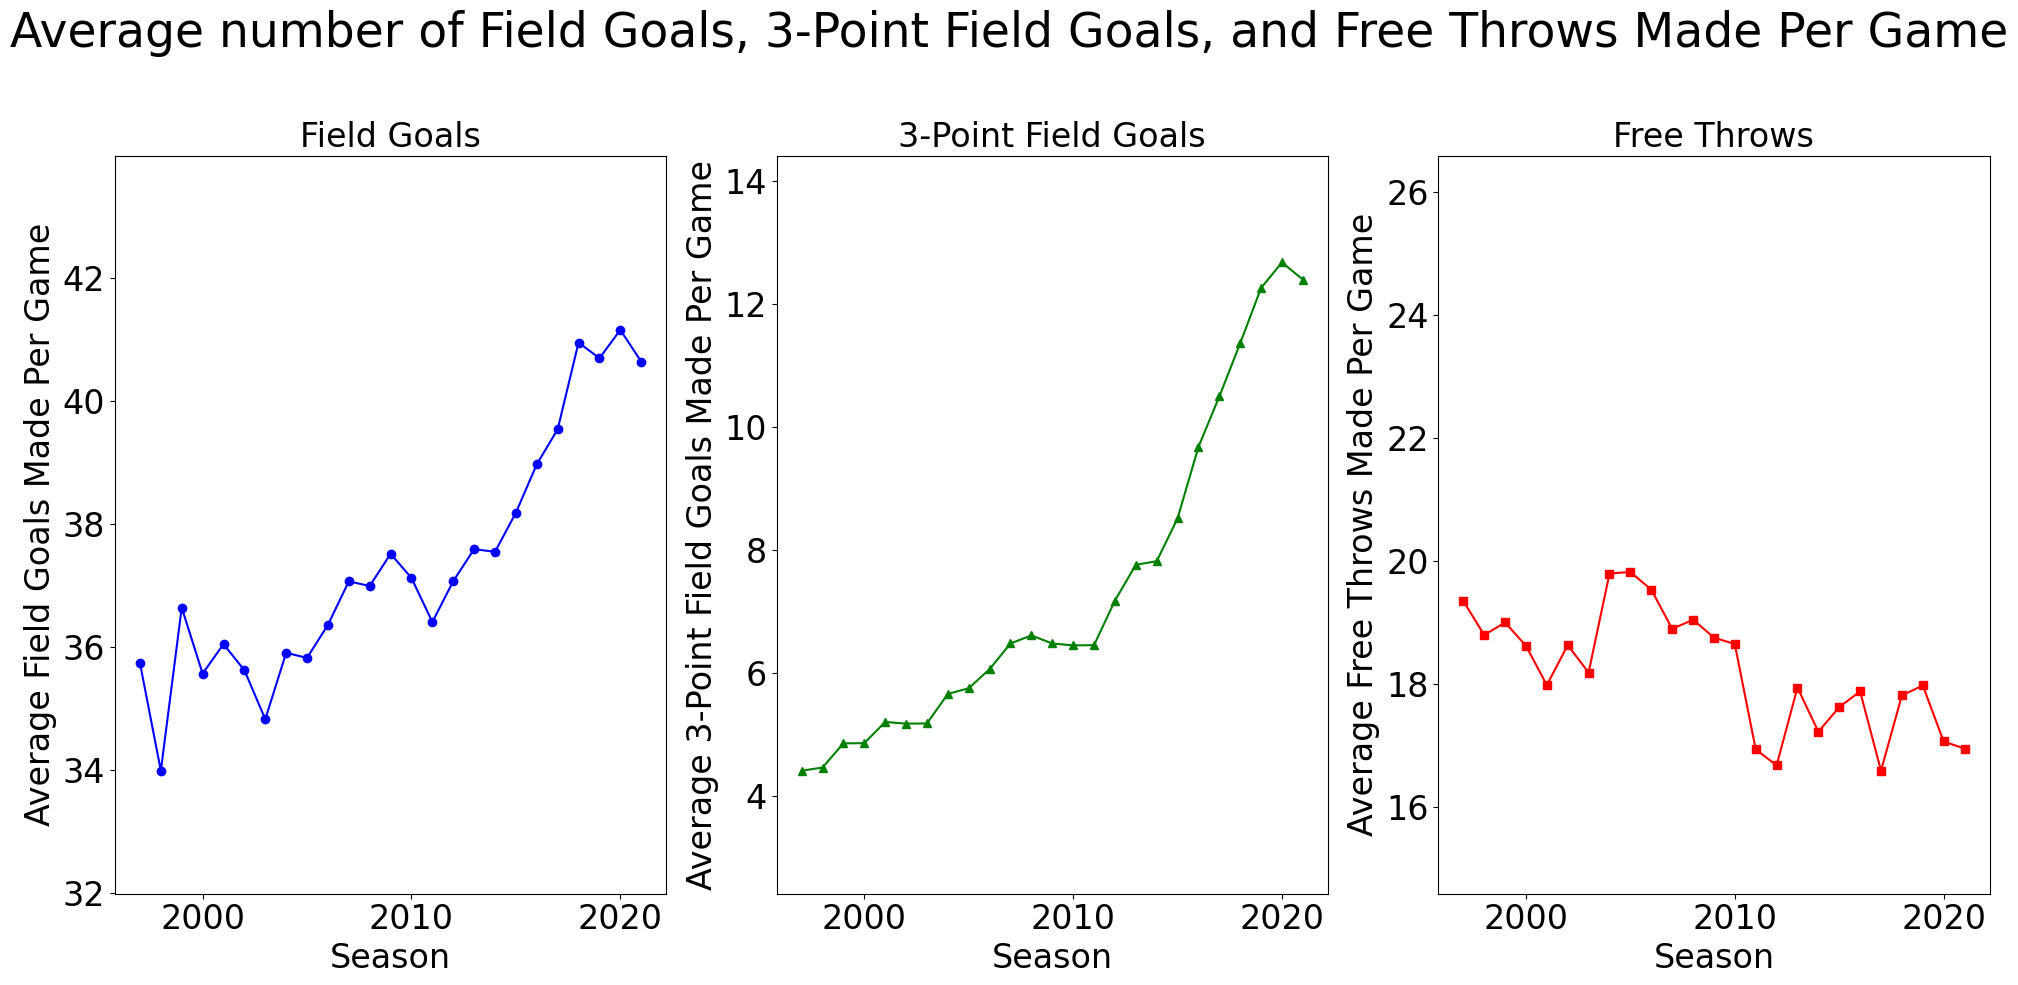

In [8]:
#Taking stats of made shots
FG = teams[["FGM", "3PM", "FTM", "Season"]].copy()
#groupby season to show seasonal averages
FG = FG.groupby("Season").mean()

#Creating arrays which will be iterated through in the for loop
stats = ["FGM", "3PM", "FTM"]
labels = ["Field Goals", "3-Point Field Goals", "Free Throws"]
colors = ['blue', 'green', 'red']
markers = ['o', '^', 's']

#Create a figure with 1x3 graphs
fig, axes = plt.subplots(1,3, figsize=(20, 10))

#Main title for the entire figure
fig.suptitle("Average number of Field Goals, 3-Point Field Goals, and Free Throws Made Per Game\n", fontsize=34)

#iterate through stats
for i, stat in enumerate(stats):
    
    #for axes[i]
    ax = axes[i]
    #Plot "Seasons" as the x value, and made shot stats as Y value. Also assign colors and markers
    ax.plot(FG.index, FG[stat], color=colors[i], marker=markers[i])
    #set title and fontsize
    ax.set_title(labels[i], fontsize = 24)
    #set xlabel and fontsize
    ax.set_xlabel("Season", fontsize=24)
    #set ylabel and fontsize
    ax.set_ylabel("Average " + labels[i] + " Made Per Game", fontsize = 24)
    #set the Y-range of each graph to be 2 less than the minimum value, and 10 more than the minimum value.
    #This makes the range a length of 12 for each, allowing for fair comparison
    ax.set_ylim(FG[stat].min()-2, FG[stat].min()+10)
    #Increase x and y ticks fontsize
    ax.tick_params(axis='y', labelsize=24)
    ax.tick_params(axis='x', labelsize=24)
    
    #Plot the graphs
    ax.yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=0))

#make the layout tight and organized, then show the visualisation
plt.tight_layout()
plt.show()

The purpose of this graph is to show the change in average shots made per game from 1997-2021. While the values are different, it is important to see how each of these changed over time from 1997 to 2021. This is why I specifically made the range of each graph the same length. 

Here, we clearly see that the average number of field goals and 3-point field goals increased, which can be directly related to the increase in PPG. On the other hand, the average number of free throws decreased, which implies that players were taking more 2 and 3 point shots, rather than free throws.

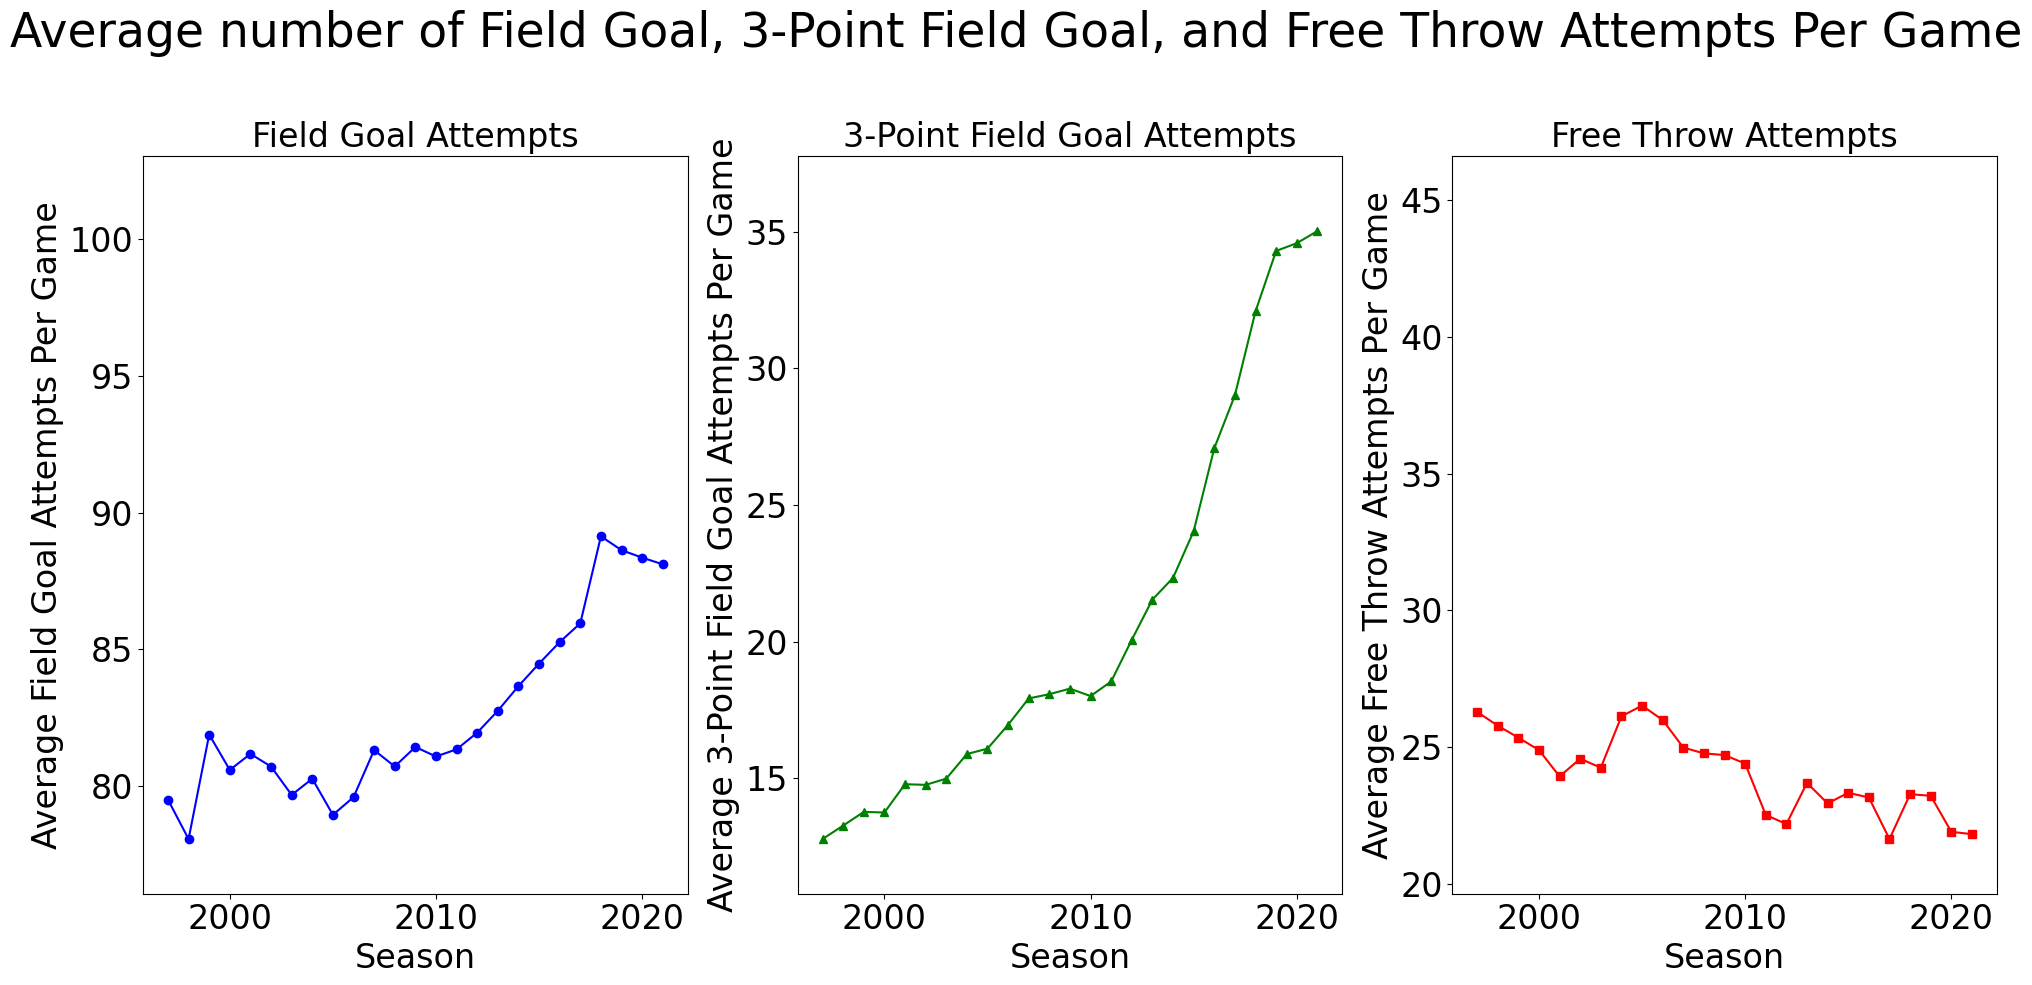

In [9]:
#Taking stats of attempted shots
attempts = teams[["FGA", "3PA", "FTA", "Season"]].copy()
#groupby season to show seasonal averages
attempts = attempts.groupby("Season").mean()

#creating arrays which will be iterated through in the for loop
stats = ["FGA", "3PA", "FTA"]
labels = ["Field Goal Attempts", "3-Point Field Goal Attempts", "Free Throw Attempts"]
colors = ['blue', 'green', 'red']
markers = ['o', '^', 's']

#Create a figure with 1x3 graphs
fig, axes = plt.subplots(1,3, figsize=(20, 10))

#Set the main title for the entire figure
fig.suptitle("Average number of Field Goal, 3-Point Field Goal, and Free Throw Attempts Per Game\n", fontsize=34)

#iterate through stats
for i, stat in enumerate(stats):
    
    #for axes[i]
    ax = axes[i]
    #Plot "Seasons" as the x value, and attempted shot stats as Y value. Also assign colors and markers
    ax.plot(attempts.index, attempts[stat], color=colors[i], marker=markers[i])
    #set title and fontsize
    ax.set_title(labels[i], fontsize = 24)
    #set xlabel and fontsize
    ax.set_xlabel("Season", fontsize=24)
    #set ylabel and fontsize
    ax.set_ylabel("Average " + labels[i] + " Per Game", fontsize = 24)
    
    #set the Y-range of each graph to be 2 less than the minimum value, and 25 more than the minimum value.
    #This makes the range a length of 27 for each, allowing for fair comparison
    ax.set_ylim(attempts[stat].min()-2, attempts[stat].min()+25)
    
    #Increase x and y ticks fontsize
    ax.tick_params(axis='y', labelsize=24)
    ax.tick_params(axis='x', labelsize=24)
    
    #plot the graphs
    ax.yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=0))

#Make the layout tight, and show the graphs
plt.tight_layout()
plt.show()

This visualisation is quite similar, but now we examine the average attempts of each of these shots per game. Like above, I kept the Y range the same length for each, allowing us to fairly compare how the values changed. 

This graphic is even more telling, as we see that 3-point field goal attempts increased drastically compared to overall field goal attempts. Understandably, if more 3-point attempts are taken, more of them will be scored, which consequently will result in higher scoring games.

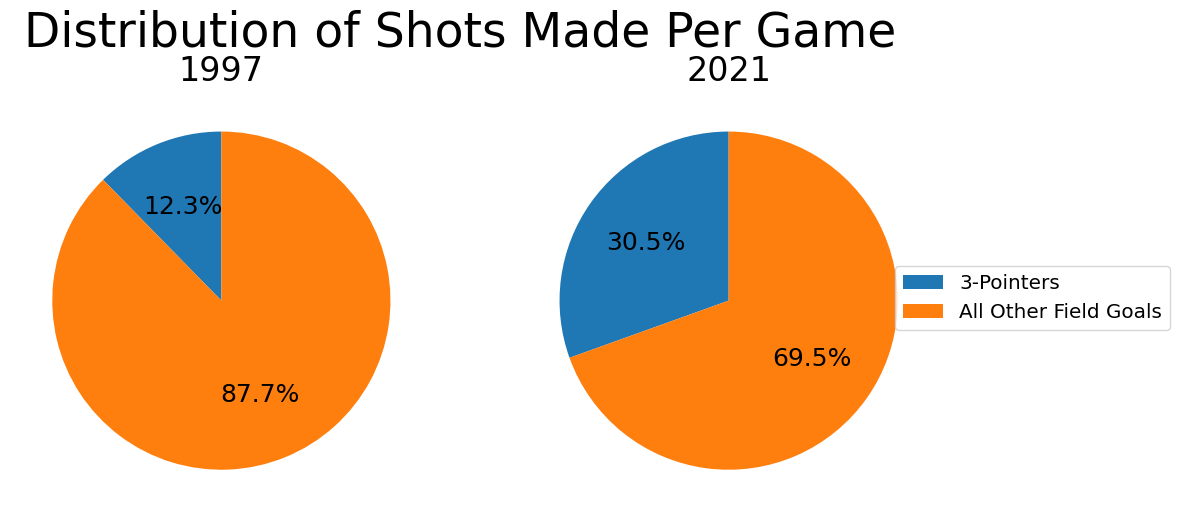

In [10]:
#Making a new df "pie" from FGM and 3PM of buckets
pie = buckets[["FGM", "3PM"]].copy()

#To get the percent of 3s out of all field goals, divide 3-pointers made by field goals made
#Then multiply by 100, and round so there are less decimal points
pie["%3s"] = ((pie["3PM"]/pie["FGM"])*100).round(2)

#Get percent of other field goals that are non-3s
pie["%Other"] = 100 - pie["%3s"]

#Focus on just 1997 and 2021
pie = pd.DataFrame(pie.loc[[1997,2021]])

#We only need the percentages, so drop these columns
pie = pie.drop(columns=["FGM","3PM"])

#Make a 1x2 figure and set the main title
fig, axes = plt.subplots(1,2,figsize=(12,6))
fig.suptitle("Distribution of Shots Made Per Game", fontsize=34)

#for the first chart, plot a pie chart with the data from 1997, display one decimal place, set starting angle to 90 degrees, and make the fontsize for the percentage labels 18.
axes[0].pie(pie.iloc[0], autopct='%1.1f%%', startangle=90, textprops={'fontsize':18})
#Set title to 1997
axes[0].set_title("1997", fontsize=24)

#for the second chart, plot a pie chart with the data from 2021, display one decimal place, set starting angle to 90 degrees, and make the fontsize for the percentage labels 18.
axes[1].pie(pie.iloc[1], autopct='%1.1f%%', startangle=90, textprops={'fontsize':18})
#set title to 2021
axes[1].set_title("2021", fontsize=24)

#set up the legend, which shows how we are looking at 3-pointers, and all other field goals. Then, choose its location and fontsize
fig.legend(list(["3-Pointers", "All Other Field Goals"]), loc='right', bbox_to_anchor=(1.1, 0.5), fontsize='x-large' )

#Show the graph
plt.show()

Since we clearly recognize how the average of field goals and 3-pointers made per game have increased from 1997 to 2021, let's visualise this in a new way.

While the 3-pointer only counts towards that shot category, they are also considered a field goal.

That being said, this visualisation depicts the average percentage 3-pointers scored, out of all field goals scored. With that, we clearly can see that in 1997 only 12.3% of field goals scored were 3-pointers, but in 2021, 30.5% of field goals scored were 3-pointers. 

Furthermore, since all other field goals only count for 2 points, this increase in 3-pointers can directly be connected to the scoring explosion seen in the NBA.

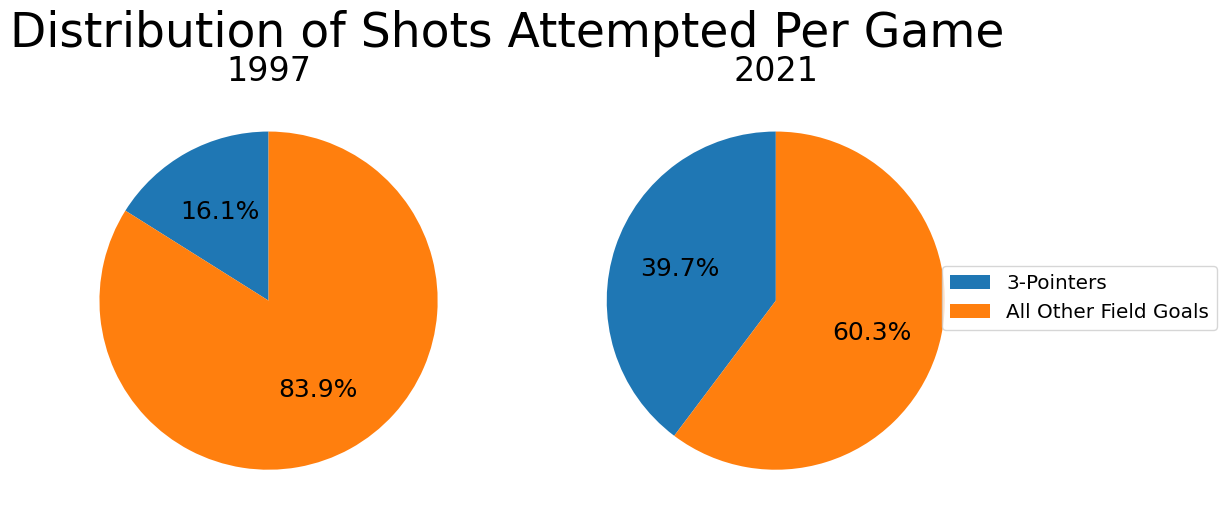

In [11]:
#Making a new df "pie" from FGA and 3PA of buckets
pie = buckets[["FGA", "3PA"]].copy()

#To get the percent of 3s out of all field goals, divide 3-pointers attempted by field goals attempted
#Then multiply by 100, and round so there are less decimal points
pie["%3s"] = ((pie["3PA"]/pie["FGA"])*100).round(2)

#Get percent of other field goals that are non-3s
pie["%Other"] = 100 - pie["%3s"]

#We just need data from 1997 and 2021
pie = pd.DataFrame(pie.loc[[1997,2021]])

#We only need the percentages, so drop these columns
pie = pie.drop(columns=["FGA","3PA"])

#Make a 1x2 figure and set main title
fig, axes = plt.subplots(1,2,figsize=(12,6))
fig.suptitle("Distribution of Shots Attempted Per Game", fontsize=34)

#first chart: plot a pie chart with the data from 1997, display one decimal place, set starting angle to 90 degrees, and make the fontsize for the percentage labels 18.
axes[0].pie(pie.iloc[0], autopct='%1.1f%%', startangle=90, textprops={'fontsize':18})
#set title to 1997
axes[0].set_title("1997", fontsize=24)

#second chart: plot a pie chart with the data from 2021, display one decimal place, set starting angle to 90 degrees, and make the fontsize for the percentage labels 18.
axes[1].pie(pie.iloc[1], autopct='%1.1f%%', startangle=90, textprops={'fontsize':18})
#set title to 2021
axes[1].set_title("2021", fontsize=24)

#set up the legend, which shows how we are looking at 3-pointers, and all other field goals. Then, choose its location and fontsize
fig.legend(list(["3-Pointers", "All Other Field Goals"]), loc='right', bbox_to_anchor=(1.1, 0.5), fontsize='x-large' )

#Show visualisation
plt.show()

Again, we can visualise the percentage of 3-pointers out of all field goals, but in this case, we are examining shot attempts rather than makes.

This visualisation further solidifies our earlier findings. It is clear that 3-point shot attempts made up a significantly larger portion of overall field goals attempted, which explains the increase in 3-pointers scored, resulting in higher scoring matches.

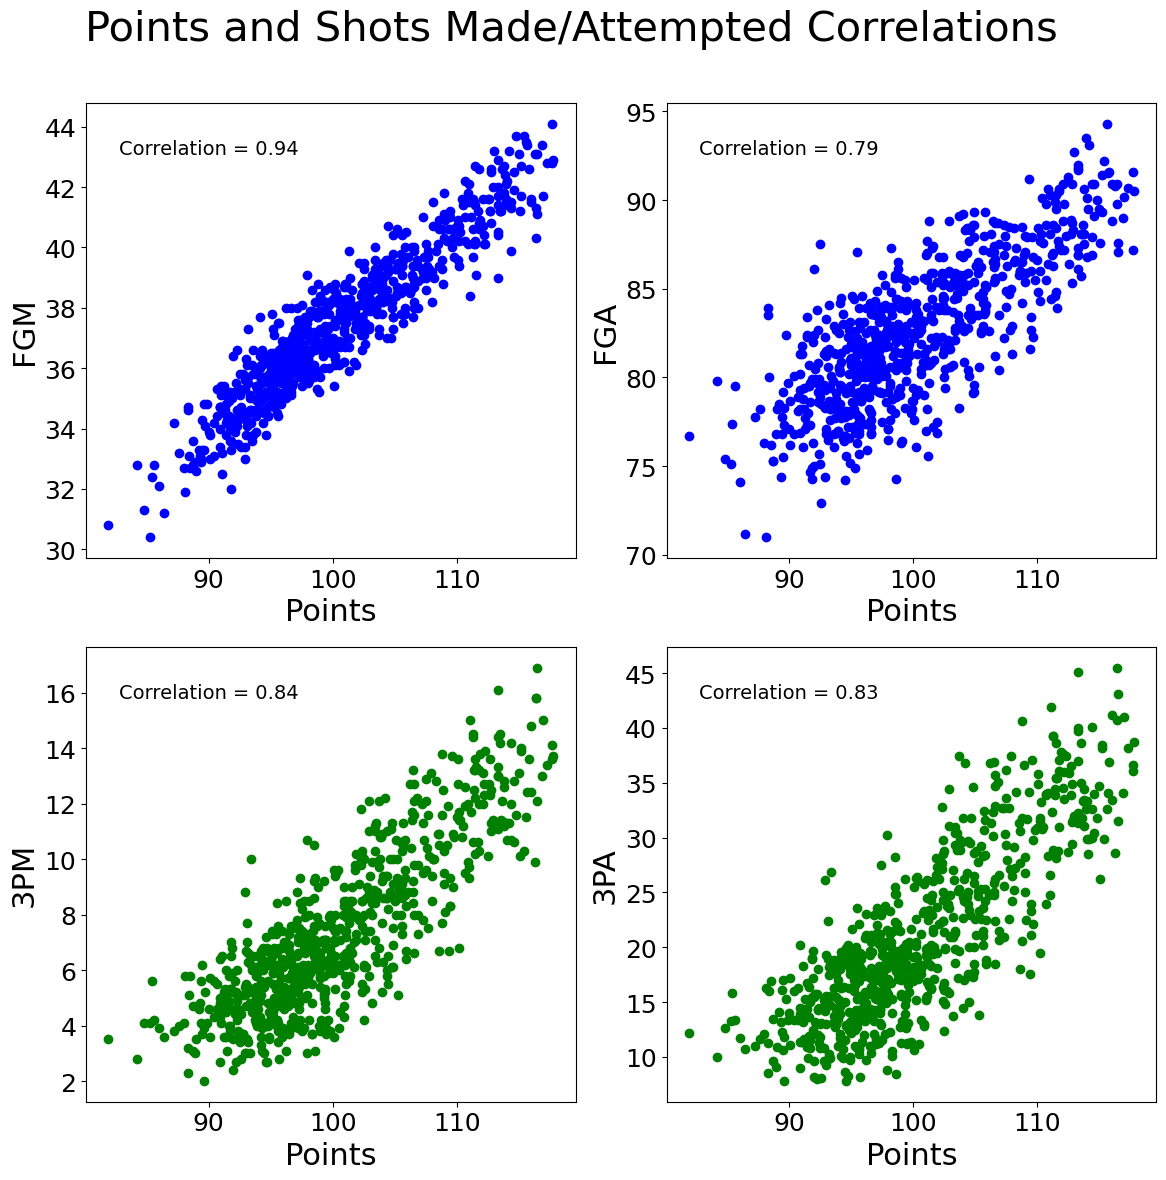

In [12]:
#Create df corr using certain columns
corr = teams[["FGM", "FGA", "3PM", "3PA", "Pts"]].copy()

#Make a 2x2 figure and set the main title
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
fig.suptitle("Points and Shots Made/Attempted Correlations\n", fontsize=30)

#Make arrays that the for loop will iterate through
stats = [["FGM","FGA"], ["3PM","3PA"]]

#Nested for loop because the figure is 2x2
for i, stat_group in enumerate(stats):
    for x, stat in enumerate(stat_group):
        if i == 0:
            #make the first 2 graphs' dots blue
            color = 'blue'
        else:
            #make the first 2 graphs' dots green
            color = 'green'
         
        #X value is points, and Y value is the given stat. c is the color
        axes[i, x].scatter(corr["Pts"], corr[stat], c=color)
        
        #Set X and Y labels and fontsizes
        axes[i, x].set_ylabel(stat, fontsize=22)
        axes[i, x].set_xlabel("Points", fontsize=22)
        #Adjust x and y tick sizes
        axes[i, x].tick_params(axis='y', labelsize=18)
        axes[i, x].tick_params(axis='x', labelsize=18)
        
        #Calculate the correlation between Pts and the given stat
        corr_coef = corr["Pts"].corr(corr[stat])
        
        #Writes the correlation with 2 decimal places at x and y value of the coordinate system. 
        #transform defines the coordinate system for the position of the text
        #'ha' is horizontal alignment and 'va' is vertical alignment. Set fontsize of this text
        axes[i, x].text(0.250, 0.9, f"Correlation = {corr_coef:.2f}", 
                        transform=axes[i, x].transAxes, ha='center', va='center', fontsize=14)
        
#tight layout and show
plt.tight_layout()
plt.show()

To conclude our findings for our first research question, we see the correlations between the average PPG and the average number of field goals and 3-pointers made/attempted.

For all the previous visualisations, we used the seasonal league-wide averages from 'groupby', but in this case, each dot represents an individual team's average during a given season.

From this graphic and the rest of the visualisations above, it is safe to say that more 3-Pointers and more field goals are a massive reason for the NBA's scoring explosion.

## <Center>Research Question 2: How are defensive statistics related to the average PPG?

Now that we've examined how scoring methods relate to the increase in PPG over the years, let's look at some defensive statistics.

In [13]:
#create df "D" containing defensive stats, points, and season
D = teams[["Dreb", "Blk", "Stl", "Pts", "Season"]].copy()
#get the seasonal league-wide averages of each
D = D.groupby("Season").mean()

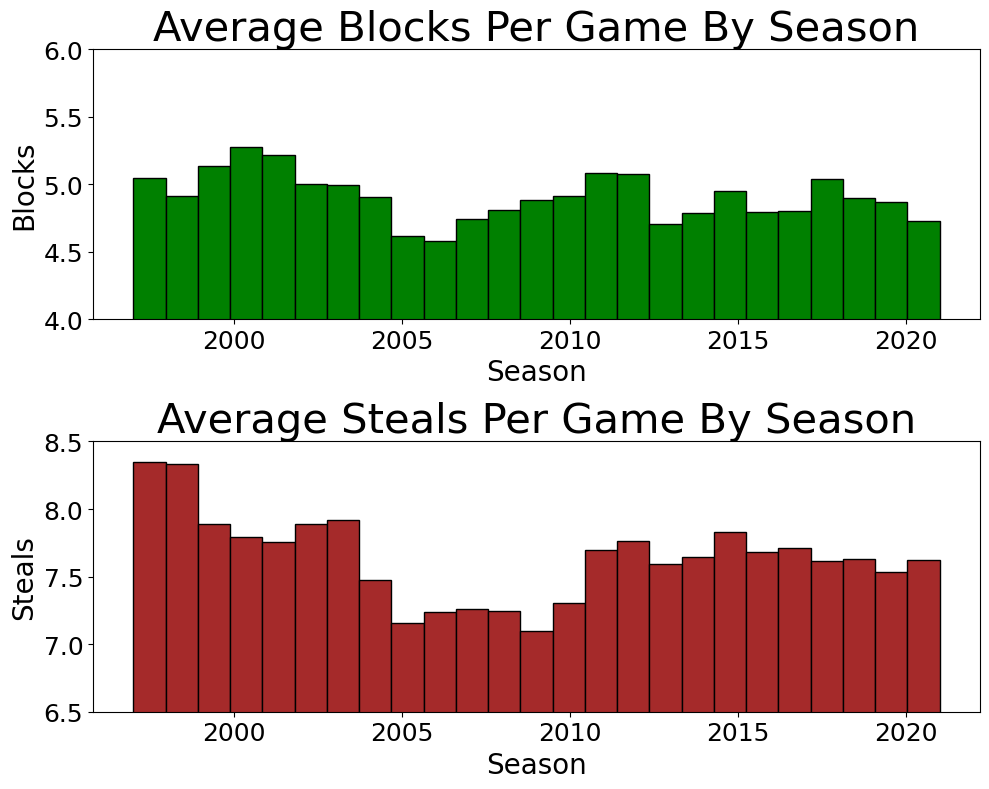

In [14]:
#Make a 2x1 figure and set the main title
fig, axes = plt.subplots(2,1, figsize=(10,8))
suptitle = ("Average Steals & Blocks Per Game By Season")

#Create arrays that the for loop will iterate through and access
def_vars = ["Blk", "Stl"]
def_names = ["Blocks", "Steals"]

#Loop through def_values
for i, stat in enumerate(def_vars):
    if i==0:
        #for the first graph, make it green, and specify the Y range.
        col = 'green'
        axes[i].set_ylim(4, 6)
    else:
        #for the second graph, make it brown, and specify the Y range.
        col = 'brown'
        axes[i].set_ylim(6.5, 8.5)
        
        #***notice that both Y ranges are a total of 2.***

    #plot histogram using Seasons for the x values.
    #The length will be from bins=len(D) which is the amount of observations
    #The weight will be the value. This will be average blocks per game and steals per game
    #Set color and the border color to black
    axes[i].hist(D.index, bins=len(D), weights=D[stat], color=col, edgecolor='black')
    #Set x label and fontsize
    axes[i].set_xlabel("Season", fontsize=20)
    #Set y label using the arrays above, and set fontsize
    axes[i].set_ylabel(def_names[i], fontsize=20)
    #Set title using the arrays above and set fontisze
    axes[i].set_title("Average " + def_names[i] + " Per Game By Season", fontsize=30)
    #Adjust tick size for x and y
    axes[i].tick_params(axis='y', labelsize=18)
    axes[i].tick_params(axis='x', labelsize=18)

#tight layout and show
plt.tight_layout()
plt.show()

Here, we are analyzing two histograms, which serve a very similar purpose as a time-series. The reason I used histograms instead is because the values do not vary as much, therefore a histogram better illustrates the changes of values.

My hypothesis suggests that if there are less blocks and steals, it’d be easier for the offense to score, resulting in more points scored. However, these visualisations suggest otherwise.

If the defense was truly lacking, blocks and steals per game would noticeably decrease significantly over the seasons. However, the range of values for both statistics never exceeds 2. 

Since the defensive statistics haven’t changed much from 1997-2021, it can be concluded that the increase in PPG cannot be attributed to a lack of steals or blocks.

In [15]:
#redefining teams with different stats
D = teams[["Dreb", "FGA", "Pts", "Season"]].copy()
#groupby by season to get the seasonal league-wide averages
D = D.groupby("Season").mean()

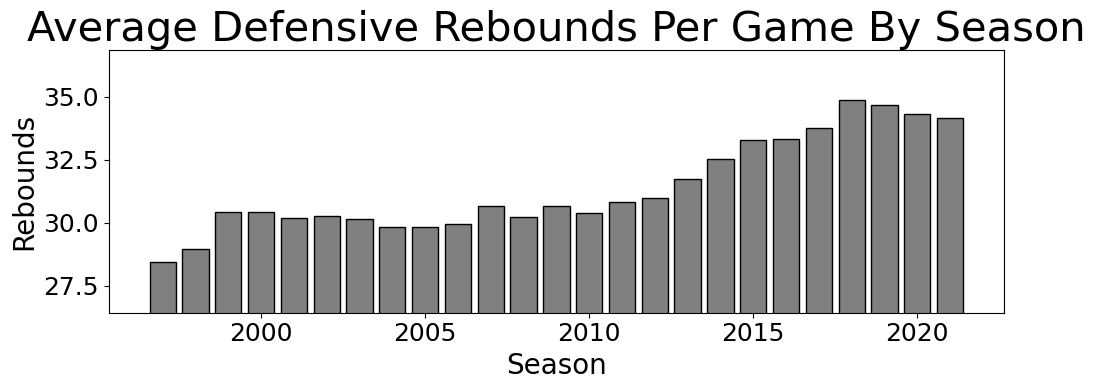

In [16]:
#Create a figure for 1 graph
fig, ax = plt.subplots(1, figsize=(10,4))

#Create a bar graph. The x values are seasons, the y values are defensive rebounds per game
#Set the color of the rectangles to grey, and the border to black
ax.bar(D.index, D["Dreb"], color='grey', edgecolor='black')

#Set x and y labels and fontsizes
ax.set_xlabel("Season", fontsize=20)
ax.set_ylabel("Rebounds", fontsize=20)
#Set title and fontisze
ax.set_title("Average Defensive Rebounds Per Game By Season", fontsize=30)
#Adjust x and y tick sizes
ax.tick_params(axis='y', labelsize=18)
ax.tick_params(axis='x', labelsize=18)

#Set the y range to be 2 less than the minimum value, and 2 more than the maximum value
ax.set_ylim(D["Dreb"].min()-2, D["Dreb"].max()+2)

#tight layout and show
plt.tight_layout()
plt.show()

It would be difficult to attribute an increase in defensive rebounds to the increase in PPG. This is because a defensive rebound is achieved when a player retrieves the ball off of the rim, following a missed field goal attempt from the opponent.

While it cannot be attributed to points, we can try to figure out the reason that average defensive rebounds per game have increased, as clearly shown by this bar graph.

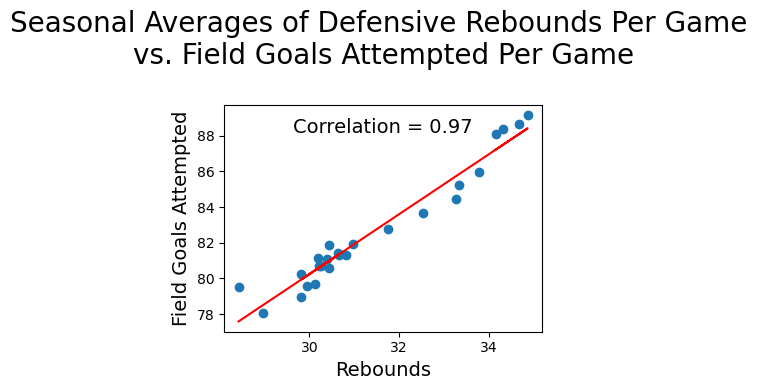

In [17]:
#create a figure for 1 graph
fig, ax = plt.subplots(figsize=(4,4))

#assign coefs to a polynomial represented by the columns Dreb and FGA. 
#The "1" means the polynomial is linear
coefs = np.polyfit(D["Dreb"], D["FGA"], 1)
#creates a polynomial using the coefficients obtained above
poly = np.poly1d(coefs)

#Plots the regression line using x values of Dreb and Y values from the polynomial. Set color to red
ax.plot(D["Dreb"], poly(D['Dreb']), color='red')
#store the correlation in variable corr_val
corr_val = D['Dreb'].corr(D['FGA'])

#Write the correlation with 2 decimal places at x=.5 and y=.9 of the coordinate system. 
#transform defines the coordinate system for the position of the text
#'ha' is horizontal alignment and 'va' is vertical alignment. Set fontsize of this text to 14.
ax.text(0.5, 0.9, f"Correlation = {corr_val:.2f}", 
                        transform=ax.transAxes, ha='center', va='center', fontsize=14)

#Plot the scatter dots using Dreb for x values and FGA for Y values
ax.scatter(D['Dreb'], D['FGA'])
#Set title and fontsize
ax.set_title("Seasonal Averages of Defensive Rebounds Per Game \nvs. Field Goals Attempted Per Game\n", fontsize=20)
#Set x and y labels and font sizes
ax.set_xlabel("Rebounds", fontsize=14)
ax.set_ylabel("Field Goals Attempted",fontsize=14)

#tight layout and show
plt.tight_layout()
plt.show()

Remembering that field goal attempts increase over the seasons we are examining, I hypothesised that the increase in defensive rebounds was due to the increase in field goals attempted. This is because if more field goals are attempted, there will be more opportunities for the opposing team to get defensive rebounds. 

According to the scatterplot, this hypothesis was deemed true. Indeed, because of more field goal attempts over the years, players were able to acquire more defensive rebounds.

While we were able to find a relationship between defensive rebounds and field goals attempted, there were no other meaningful linkages between defensive statistics and the increase in PPG.

## <Center>Research Question 3: Which other statistics might affect the average PPG?

Having looked into the scoring and defensive statistics, let's investigate how assists or personal fouls play a role in the inflated number of PPG from 1997-2021.

In [18]:
#Create df misc using other columns
misc = teams[["To", "Pf", "Ast", "Pts", "Season", "FTA"]].copy()
#groupby season to get the seasonal league-wide averages
misc = misc.groupby("Season").mean().reset_index()

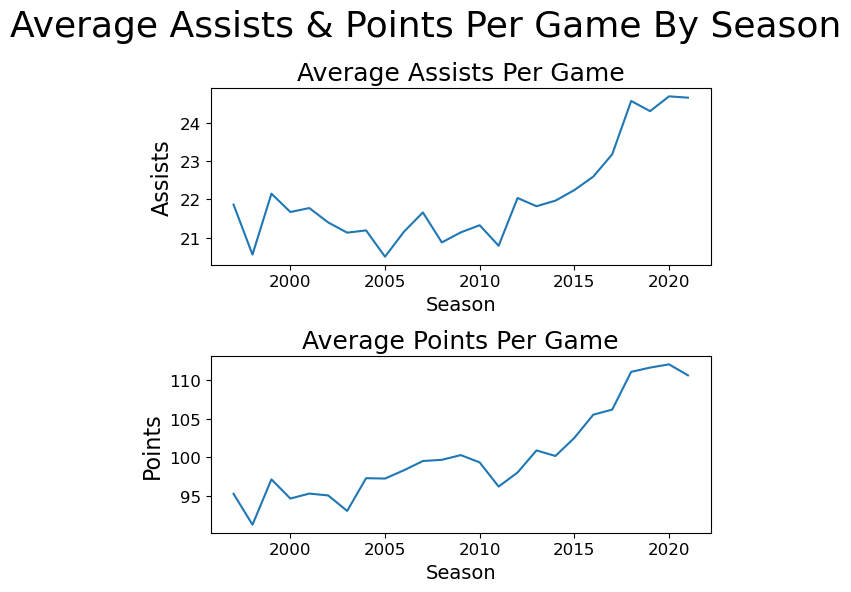

In [19]:
#from misc, create df ast
ast = misc[["Ast","Pts","Season"]]

#make a 2x1 figure 
fig, axes = plt.subplots(2, 1, figsize=(6,6))

#create arrays for the for loop to iterate through
stats = ["Ast", "Pts"]
stat_names = ["Assists", "Points"]
#Make the overall title and set fontsize
fig.suptitle("Average Assists & Points Per Game By Season", fontsize=26)

#for loop iterating through stats
for i, statistic in enumerate(stats):
    
    #Plot x values from Season, y value from given stat, and set stat name for the label
    axes[i].plot(ast["Season"], ast[statistic], label=stat_names[i])
    #Set the title and fontsize
    axes[i].set_title("Average " + stat_names[i] + " Per Game", fontsize=18)
    #set xlabel and ylabel and fontsizes
    axes[i].set_xlabel("Season", fontsize=14)
    axes[i].set_ylabel(stat_names[i], fontsize=16)
    #set size of x and y tickets
    axes[i].tick_params(axis='y', labelsize=12)
    axes[i].tick_params(axis='x', labelsize=12)
    
#tight layout and show
plt.tight_layout()
plt.show()

For this particular study, my initial hypothesis was that since the average PPG increases from 1997-2021, then the average assists per game would also drastically increase.

The visualisations show an increase in assists, just like I hypothesised. While the average number of points scored from 1997-2021 increased by more than 15, assists only increased by 5, but there is a reason for this. 

When a player earns an assist, the player who scores from that assist will score 2-3 points. Therefore, when approximating that the number of assists per game increased by 5 and the PPG increased by 15, it is very fair to assume that those 5 assists led to 3-pointers, because 5x3=15.

This proves that the increase in PPG also led to an increase in assists per game from 1997-2021. Furthermore, if you look at both graphs, it is very clear that they are related.

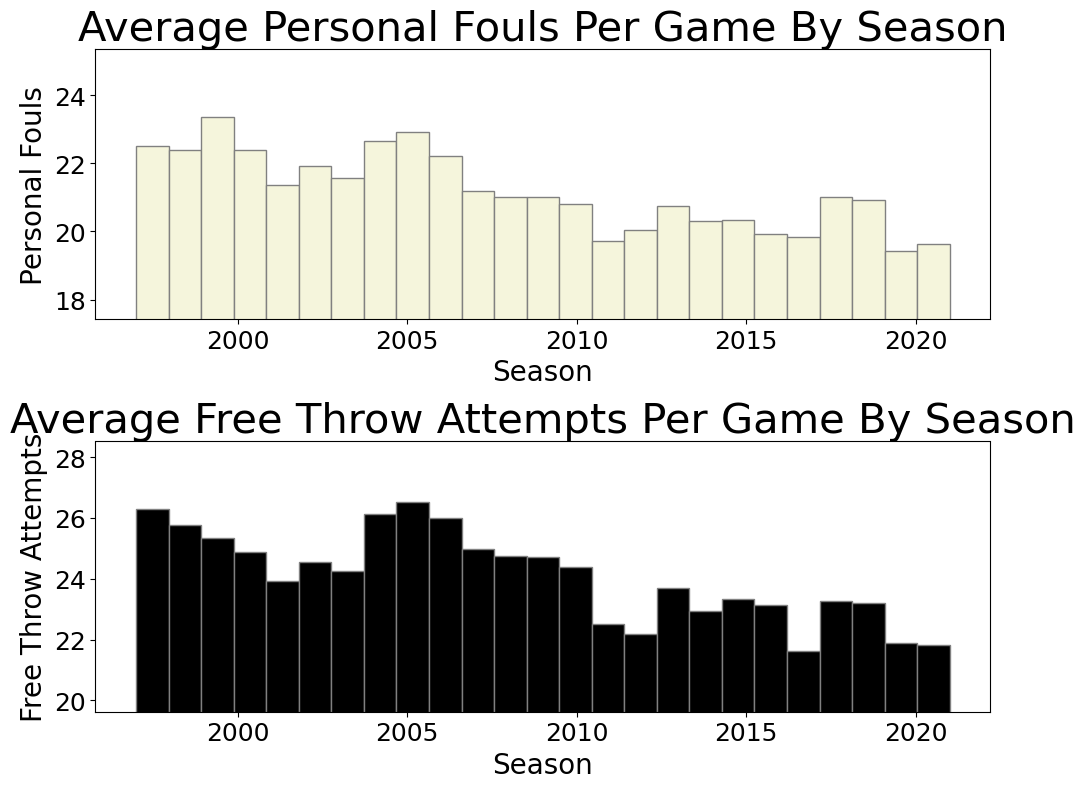

In [20]:
#Make a df "fl" from misc
fl = misc[["Pf", "Pts", "Season", "FTA"]].copy()

#make a 2x1 figure
fig, axes = plt.subplots(2,1, figsize=(10,8))

#Create arrays that the for loop will access
def_vars = ["Pf", "FTA"]
def_names = ["Personal Fouls", "Free Throw Attempts"]

#iterate through def_vars
for i, stat in enumerate(def_vars):
    if i==0:
        #first graph is beige
        col = 'beige'
    else:
        #second graph is black
        col = 'black'

    #Set the y range to 2 less than the minimum value, and 2 more than the maximum value
    axes[i].set_ylim(fl[stat].min()-2, fl[stat].max()+2)
    
    #plot histogram using Seasons for the x values.
    #The length will be from bins=len(D) which is the amount of observations
    #The weight will be the value. This will be average personal fouls per game and average free throw attempts per game
    #Set color and the border color to grey
    axes[i].hist(fl["Season"], bins=len(D), weights=fl[stat], color=col, edgecolor='grey')
    
    #Set x and y labels and fontsizes
    axes[i].set_xlabel("Season", fontsize=20)
    axes[i].set_ylabel(def_names[i], fontsize=20)
    #set titles and fontsizes
    axes[i].set_title("Average " + def_names[i] + " Per Game By Season", fontsize=30)
    #set x and y tick sizes 
    axes[i].tick_params(axis='y', labelsize=18)
    axes[i].tick_params(axis='x', labelsize=18)

#tight layout and show
plt.tight_layout()
plt.show()

While average personal fouls per game do not visibly increase like PPG does, I figured that more personal fouls would lead to more free throw attempts. This is because free throw attempts are awarded when a player has fouled another player. 

Therefore, by putting these histograms right next to each other, it is clearly noticeable that personal fouls per game affected free throw attempts per game. While the graphs aren't identical, there is an apparent similarity between these two graphs, suggesting a relationship between these two variables.

Concluding the findings for research question 3, while assists and personal fouls did not have an effect on the increase in PPG, two things can be taken away from this.

Firstly, I determined that assists per game is strongly related to PPG. After this, I concluded that personal fouls per game had an effect on free throw attempts per game. I was able to prove this by examining the values and shapes of the graphs, and further backing my claims using logic and my knowledge of the sport.

In [21]:
#create seas using the stats from Season and Pts
seas = teams[["Season", "Pts"]].copy()
#Creates an array of every unique season, which is 1997-2021
unique_seasons = seas["Season"].unique()

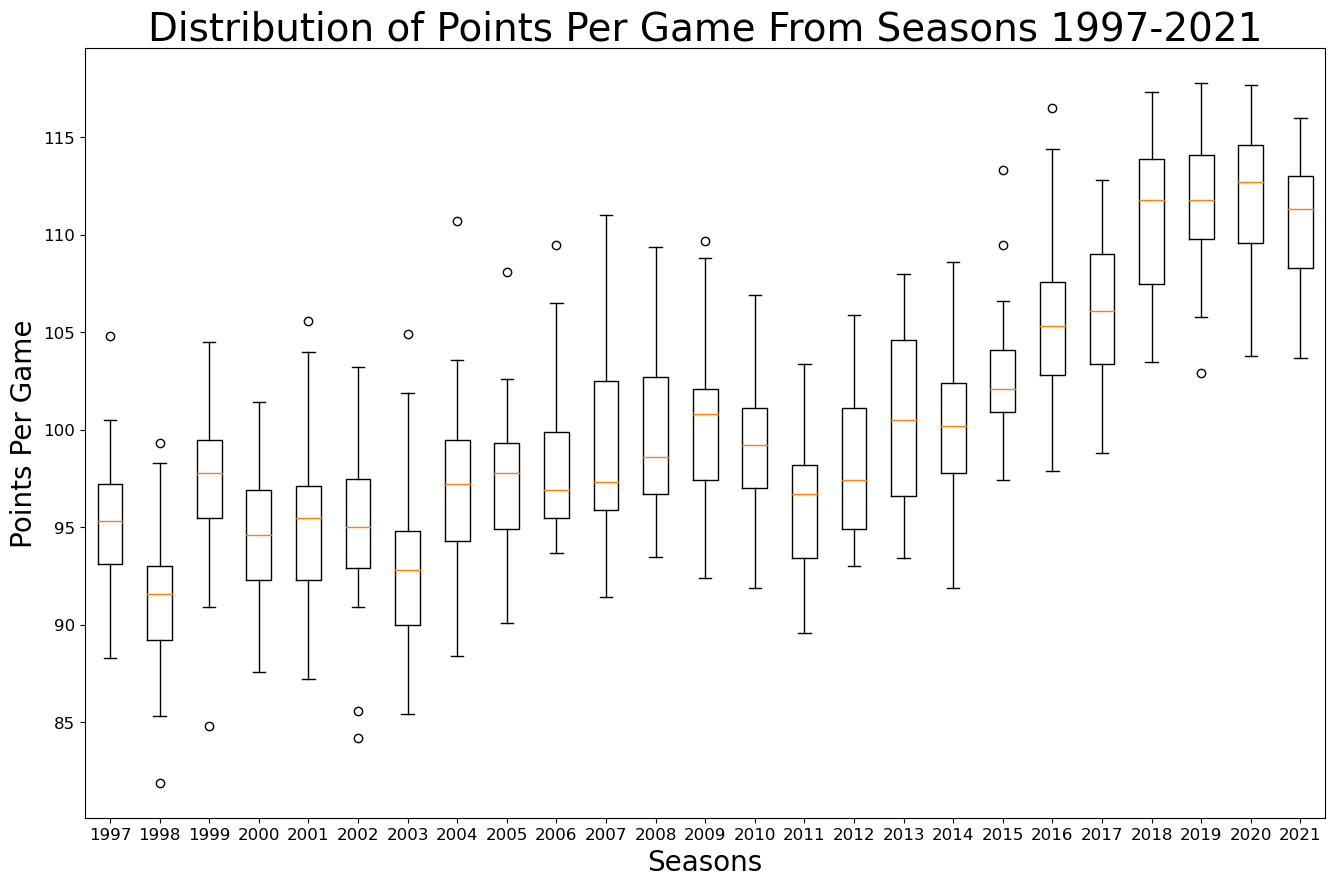

In [22]:
#Plot a 1 graph figure
plt.figure(figsize=(16,10))

#Create a boxplot for each season in unique season. This means create 1 box plot for each season from 1997-2021
#For that season, use the values of each NBA team's PPG average. Each box represents the teams' PPG distribution from a given season
#Labels makes the x ticks the array of each season
plt.boxplot([seas[seas["Season"] == season]["Pts"] for season in unique_seasons], labels=unique_seasons)

#Set graph title and fontsize
plt.title("Distribution of Points Per Game From Seasons 1997-2021", fontsize=28)
#set Xlabel/Ylabel and fontsizes
plt.xlabel("Seasons", fontsize=20)
plt.ylabel("Points Per Game", fontsize=20)
#adjust x and y tick sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Show graph
plt.show()

This box plot is a visualisation that shows the distribution of average PPG for each NBA team, from seasons 1997-2021. This gives us an idea of the general range, the median, and any outliers. It also clearly solidifies my claim that scoring in the NBA has skyrocketed over the past 20+ years, as you can obviously see how the ranges of average PPG increase.

## <center>Conclusion

This fascinating study addresses the cause of the scoring explosion in the NBA over the past 20+ seasons. Providing well established findings and other interesting relationships between statistics, this study enhances our understanding of the underlying patterns in the data.

Our most convincing finding was that the increase in 3-point makes and attempts is the main cause for the increase in PPG. The fact that the percentage of 3-pointers out of total field goals increased by at least 25% over the 20+ examined seasons proves that this was the leading factor behind this scoring phenomenon.

As for defense, we found less convincing results. Blocks and steals did not change much over the years, concluding that the increase in PPG is not directly related to defense. However, we found an intriguing relationship between defensive rebounds and field goals attempted, proven by a strong correlation.

Lastly, with research question 3, we found that assists and PPG are intertwined statistics because they both directly relate to scoring. The visualisations and simple mathematical approximations further solidified this claim. Unrelated to scoring, we also found that personal fouls and free throws attempted clearly were linked, shown by the similar graphs.

In conclusion, we’ve learned that the increase in PPG is clearly and directly attributed to an increase in 3-point shots. As it was introduced in 1979, players have gotten significantly better at this aspect of the game, and with the ability to score 3 rather than 2 points, they’ve focused on this skill, and used it to their advantage. While we can confidently say 3-pointers are the reason for this scoring phenomenon as of yet, we can eagerly watch as this ever-changing game continues to evolve.

## References

Bhatnagar, Rishabh. (2022, November 8). When was the 3-point line introduced in the NBA? sportskeeda. https://www.sportskeeda.com/basketball/when-3-point-line-introduced-nba 

The Athletic NBA Staff. (2023, January 6). NBA’s scoring explosion: What’s happening, can it continue and will anyone score 82 (or more)? The Athletic. https://theathletic.com/4063884/2023/01/06/nbas-scoring-explosion/

In [23]:
%%js

// Run this cell to update your word count.

function wordcount() {
    let wordCount = 0
    let extraCount = 0
    let mainBody = true

    let cells = Jupyter.notebook.get_cells()
    cells.forEach((cell) => {
        if (cell.cell_type == 'markdown') {
            let text = cell.get_text()
            // Stop counting as main body when get to References or Appendices.
            if (text.startsWith('## References') ||
                text.startsWith('## Appendices')) {
                mainBody = false
            }
            if (text.startsWith('## Word Count')) {
                text = ''
            }
            if (text) {
                let words = text.toLowerCase().match(/\b[a-z\d]+\b/g)
                if (words) {
                    let cellCount = words.length
                    if (mainBody) {
                        wordCount += cellCount
                    } else {
                        extraCount += cellCount
                    }
                }
            }
        }
    })
    return [wordCount, extraCount]
}

let wc = wordcount()
element.append(`Main word count: ${wc[0]} (References and appendices word count: ${wc[1]})`)

<IPython.core.display.Javascript object>